In [5]:
import os
import keras
import numpy as np
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
num_classes = 10   

train_images = np.float32(train_images)/255.
train_images = np.expand_dims(train_images, -1) 
test_images = np.float32(test_images)/255.  
test_images = np.expand_dims(test_images, -1)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels  = keras.utils.to_categorical(test_labels, num_classes)

In [7]:
print('Number of training images: ',train_images.shape[0])
print('Each training image is of size: ',train_images.shape[1:])
print('Number of training labels: ',train_labels.shape[0],'\n')
print('Number of test images: ',test_images.shape[0])
print('Each test image is of size: ',test_images.shape[1:])
print('Number of test labels: ',test_images.shape[0])

Number of training images:  60000
Each training image is of size:  (28, 28, 1)
Number of training labels:  60000 

Number of test images:  10000
Each test image is of size:  (28, 28, 1)
Number of test labels:  10000


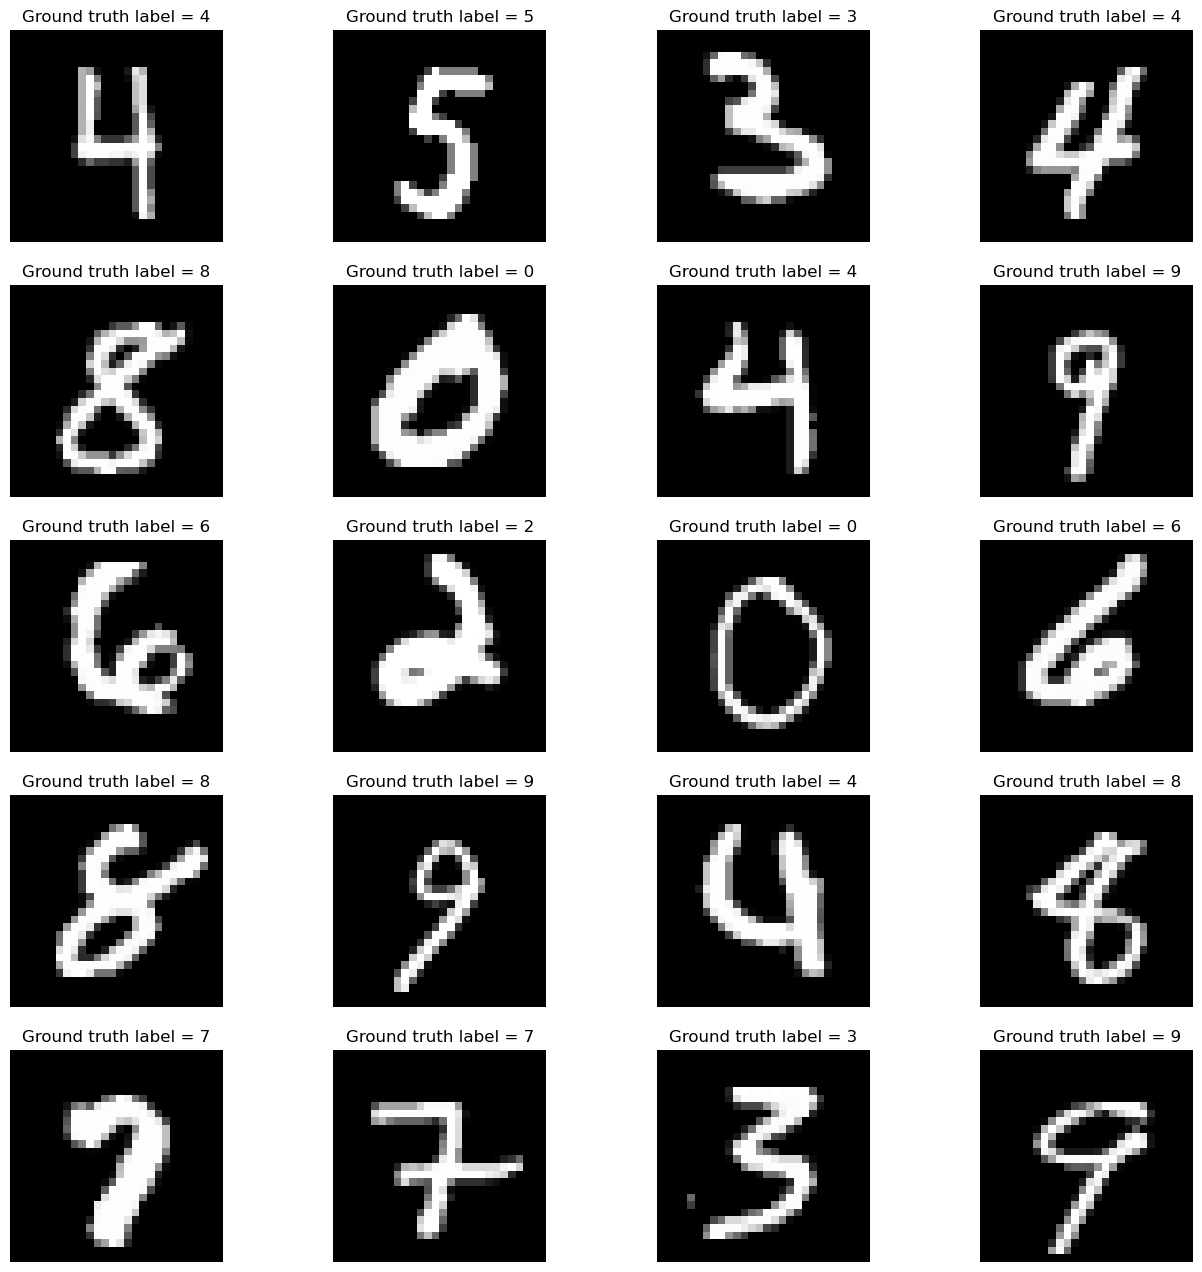

In [8]:
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    # show random images from the dataset
    random_range = randint(0, train_images.shape[0]-1)
    img = train_images[random_range]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title('Ground truth label = {}'.format(np.argmax(train_labels[random_range])))
    plt.axis('off')
plt.show()

In [9]:
input_shape = (28, 28, 1)     
num_filters = [16, 32, 64]
kernel_size = (3, 3)      
num_epochs  = 10         
learning_rate = 0.001      
batch_size = 16  

In [10]:
def model_architecture(input_shape:tuple, num_filters:list, kernel_size:tuple, num_classes:int):
    model = keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(num_filters[0], kernel_size=kernel_size, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters[1], kernel_size=kernel_size, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters[2], kernel_size=kernel_size, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(100, activation="relu"),
        Dense(num_classes, activation="softmax"), 
    ])

    return model

In [11]:
# Build the model
model = model_architecture(input_shape, num_filters, kernel_size, num_classes)

callbacks = [keras.callbacks.EarlyStopping(patience=50, verbose=1),
             keras.callbacks.ModelCheckpoint(filepath='cnn_model.h5', monitor="val_loss", save_best_only=True, verbose=1)]

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_images, train_labels, 
          batch_size=batch_size, epochs=num_epochs, 
          validation_split=0.1, verbose=1,
          callbacks=callbacks)




Epoch 1/10


3373/3375 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9299
Epoch 1: val_loss improved from inf to 0.08104, saving model to cnn_model.h5
3375/3375 [==============================] - 28s 7ms/step - loss: 0.2236 - accuracy: 0.9299 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 2/10


D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3369/3375 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9742
Epoch 2: val_loss improved from 0.08104 to 0.06018, saving model to cnn_model.h5
3375/3375 [==============================] - 21s 6ms/step - loss: 0.0830 - accuracy: 0.9742 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 3/10
3367/3375 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9814
Epoch 3: val_loss improved from 0.06018 to 0.05410, saving model to cnn_model.h5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 4/10
3374/3375 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9849
Epoch 4: val_loss improved from 0.05410 to 0.04362, saving model to cnn_model.h5
3375/3375 [==============================] - 24s 7ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 5/10
3369/3375 [============================>.] - ETA: 0s - loss: 

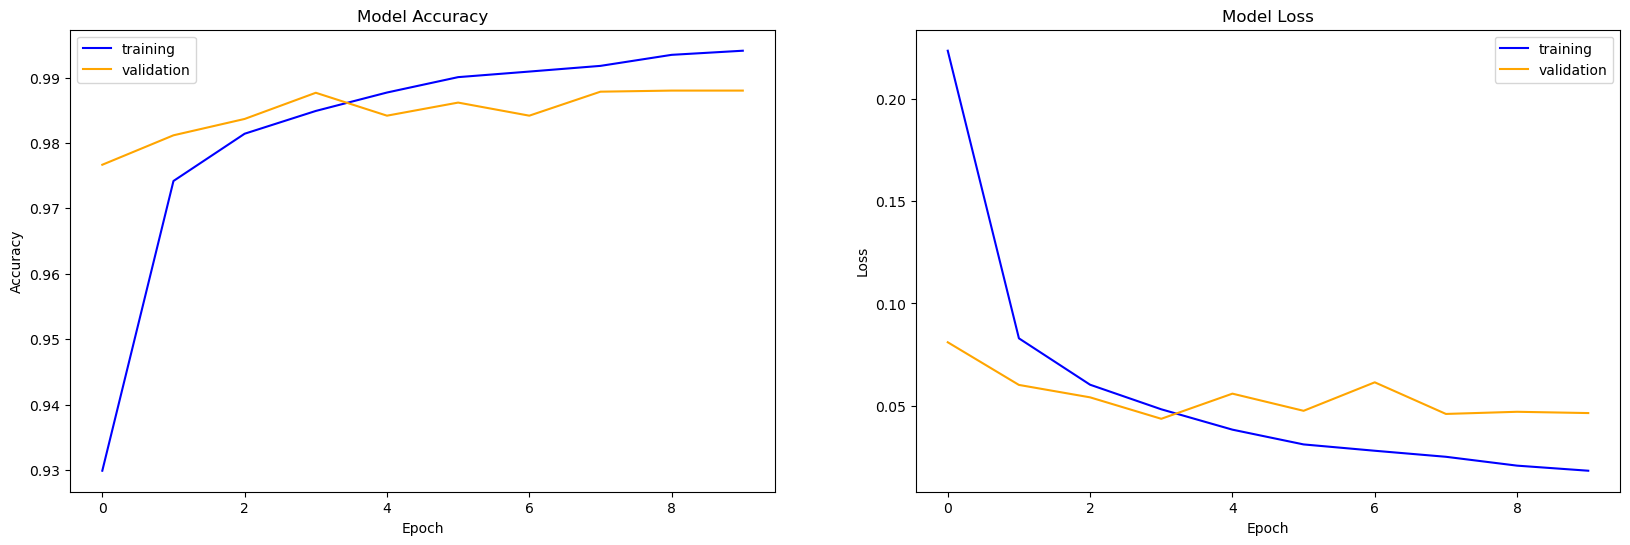

Test loss: 0.0637366846203804
Test accuracy: 0.9854000210762024


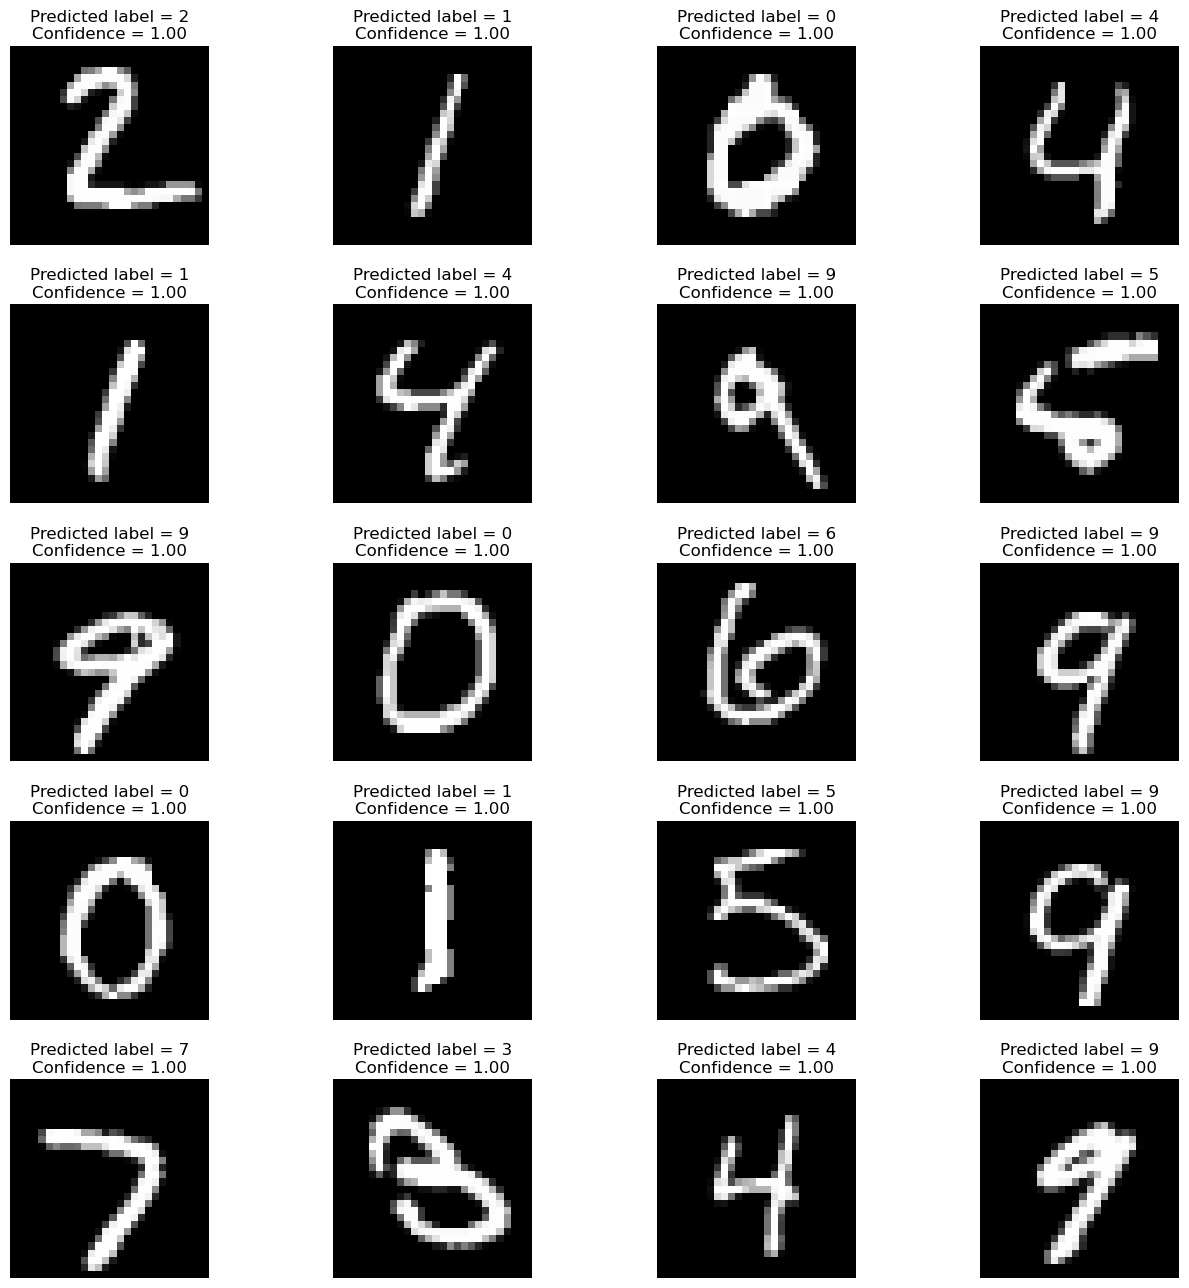

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# first plot will be of accuracies
ax[0].plot(history.history['accuracy'], color='blue', label='training')
ax[0].plot(history.history['val_accuracy'], color='orange', label='validation')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# second plot will be of the errors
ax[1].plot(history.history['loss'], color='blue', label='training')
ax[1].plot(history.history['val_loss'], color='orange', label='validation')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['training', 'validation'])

plt.show()

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


predictions = model.predict(test_images, verbose=0)

# Display
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_images[i], cmap='gray')
    plt.title('Predicted label = {}\nConfidence = {:0.2f}'.format(np.argmax(predictions[i]), np.max(predictions[i])), pad=5)
    plt.axis('off')
fig.subplots_adjust(hspace=0.3)
plt.show()

In [40]:
filepath = "numbers1/train/class2/5.png"

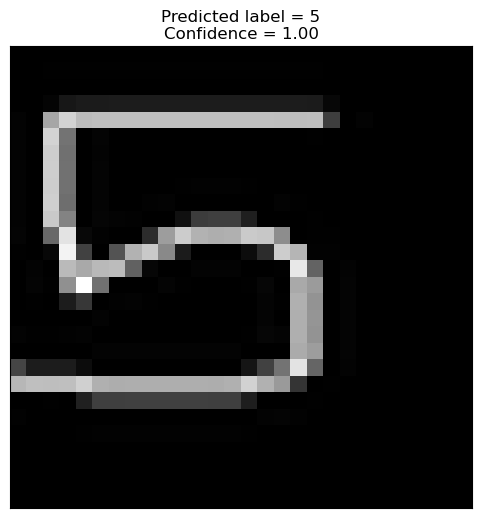

In [41]:
def test_real_digit(filepath, model):
    try:
        from PIL import Image
        import PIL.ImageOps 
    except ModuleNotFoundError:
        print("<IMPORT ERROR>: Please install the `pillow` package")
        
    img = Image.open(filepath)
    img = img.resize((28, 28), Image.Resampling.LANCZOS) 
    img = img.convert('L') 
    img = PIL.ImageOps.invert(img) 
    img = np.expand_dims(img, -1)
    img = np.expand_dims(img, 0)  
    img = img.astype('float')/img.max()
    prediction = model.predict(img, verbose=0)[0]
    return img, prediction

im, test_pred = test_real_digit(filepath, model)

# Visualize it
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im[0, :, :, 0], cmap='gray') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Predicted label = {}\nConfidence = {:0.2f}'.format(np.argmax(test_pred), np.max(test_pred)), pad=5)
plt.show()


In [35]:
def preprocess_image(image_path, target_size=(28, 28)):
    try:
        from PIL import Image
    except ModuleNotFoundError:
        print("<IMPORT ERROR>: Please install the `pillow` package")
        return None

    img = Image.open(image_path)
    img = img.resize(target_size, Image.Resampling.LANCZOS)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0) 
    img = np.expand_dims(img, axis=-1) 
    return img

def test_real_digit(image_path, model):
    img = preprocess_image(image_path)
    if img is not None:
        prediction = model.predict(img, verbose=0)[0]
        return img, prediction
    else:
        return None, None

# Usage example
image_path = "numbers1/train/class2/P2.JPEG"
im, test_pred = test_real_digit(image_path, model)

if im is not None and test_pred is not None:
    # Visualize it
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(im[0, :, :, :]) 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Predicted label = {}\nConfidence = {:0.2f}'.format(np.argmax(test_pred), np.max(test_pred)), pad=5)
    plt.show()
else:
    print("Error: Unable to load or preprocess the image.")

AbortedError: Graph execution error:

Detected at node sequential/max_pooling2d/MaxPool defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\lenovo\AppData\Local\Temp\ipykernel_10760\327021611.py", line 25, in <module>

  File "C:\Users\lenovo\AppData\Local\Temp\ipykernel_10760\327021611.py", line 18, in test_real_digit

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\pooling\base_pooling2d.py", line 84, in call

Compute received an exception:Status: 2, message: could not create a descriptor for a pooling forward propagation primitive, in file tensorflow/core/kernels/mkl/mkl_maxpooling_op.cc:211
	 [[{{node sequential/max_pooling2d/MaxPool}}]] [Op:__inference_predict_function_157063]

In [ ]:
from PIL import Image, ImageDraw
 
img = Image.new('RGB', (100, 30), color = (73, 109, 137))
 
d = ImageDraw.Draw(img)
d.text((10,10), "Hello World", fill=(255,255,0))
 
img.save('pil_text.png')

In [ ]:
# from PIL import Image, ImageDraw

# for i in range(1, 251):
#     img = Image.new('RGB', (200, 200), color=(73, 109, 137))
#     d = ImageDraw.Draw(img)
#     text = str(i)
#     text_width, text_height = d.textsize(text)
#     position = ((200 - text_width) // 2, (200 - text_height) // 2)
#     d.text(position, text, fill=color)
#     filename = f"{i}.png"
#     img.save(filename)

# print("Images generated successfully.")

In [ ]:
from PIL import Image, ImageDraw

for i in range(1, 251):
    img = Image.new('RGB', (200, 200), color=(73, 109, 137))
    d = ImageDraw.Draw(img)
    text = str(i)
    text_box = d.textbox((0, 0), text)
    text_width = text_box[2] - text_box[0]
    text_height = text_box[3] - text_box[1]
    
    a = ((200 - text_width) // 2, (200 - text_height) // 2)
    d.text(a, text, fill=color)
    filename = f"{i}.png"
    img.save(filename)

print("Images generted succesfuly.")

In [10]:
# import os
# from PIL import Image, ImageDraw

# directory = 'pict'

# for i in range(1, 251):
#     img = Image.new('RGB', (200, 200), color=(73, 109, 137))
#     d = ImageDraw.Draw(img)
#     text = str(i)
#     text_box = d.textbbox((0, 0), text)
#     text_width = text_box[2] - text_box[0]
#     text_height = text_box[3] - text_box[1]
    
#     a = ((200 - text_width) // 2, (200 - text_height) // 2)
#     color = (255, 255, 255)  
#     d.text(a, text, fill=color)
    
#     filename = os.path.join(directory, f"{i}.png")  
#     img.save(filename)

# print("Images generated successfully and saved in the 'dir' directory.")

Images generated successfully and saved in the 'dir' directory.
